<a href="https://colab.research.google.com/github/wankhede10swapnil/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Swapnil_Wankhede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction**

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, hightest, and lowest stock prices of every month.

** The main objective is to predict the stock's closing price of the month. **

# **Let's Begin!**

## ***1.Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/Colab Notebooks/capstone_project_02/data_YesBank_StockPrices.csv'
dataset = pd.read_csv(path)

### Dataset First View

In [9]:
# Dataset First Look
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns Count

In [10]:
dataset.shape

(185, 5)

The shape of the dataset is 185 rows and 5 columns.

### Data Information

In [11]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
dataset.duplicated().value_counts()

False    185
dtype: int64

### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### The given dataset has 185 observations with 5 features including no missing values and no duplicates values. Date feature is of object type. closing, opening, highest and lowest stock prices are features in float datatypes.

# ***2. Understanding Variables***

In [14]:
# Convert date column to a proper datetime datatype yyyy-mm-dd.
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y")))

In [15]:
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### Variables Description

In [16]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000




*   Date :- The date (Month and Year provided)
*   Open :- The price of the stock at the beginning of a particular time period.
*   Close :- The trading price at the end (in this case end of the month)
*   High :-The Maximum price at which a stock traded during the period.
*   Low :-The Lowest price at which a stock traded during the period.

We can see from the dataset above, all the variables are quantitive it means it shows numerical values. There is no categorical data present.

The main objective is to predict the stock's closing price of the month so the closing price of stock have to be considered as dependent features whereas rest of the features are independent features.

In [17]:
# Setting date coloum as index as we need to track variation in stock price on different dates.
dataset.set_index('Date', inplace = True)

In [18]:
dependent_variable = 'Close'
independent_variables =list(set(dataset.columns.tolist())-{dependent_variable})
independent_variables

['Open', 'High', 'Low']

### 3. ***Data Vizualization, Storytelling & Experimenting with Plots : Understand the relationships between variables***

#### **Line plot**

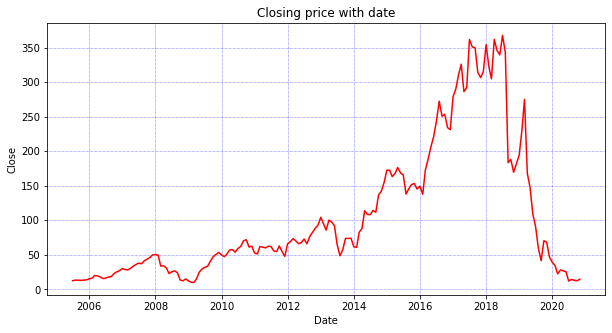

In [19]:
# plot dependent variable:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(dataset['Close'], color= 'r')
plt.title('Closing price with date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(linestyle=':', linewidth = '0.5', color = 'b') # to display and customize gridlines on a plot.
plt.show()

#### **Scatter Plots**

To check the linearity between dependent variable and independent variables. we are plotting the scatter plots.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


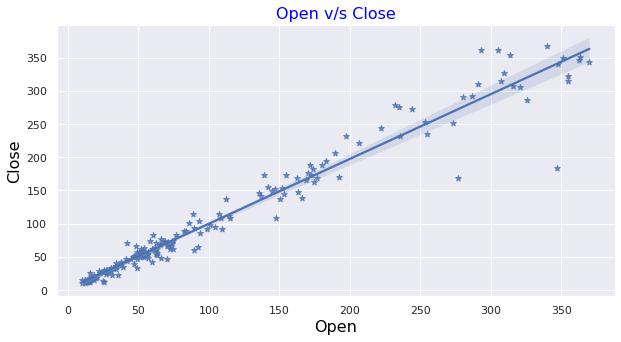

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


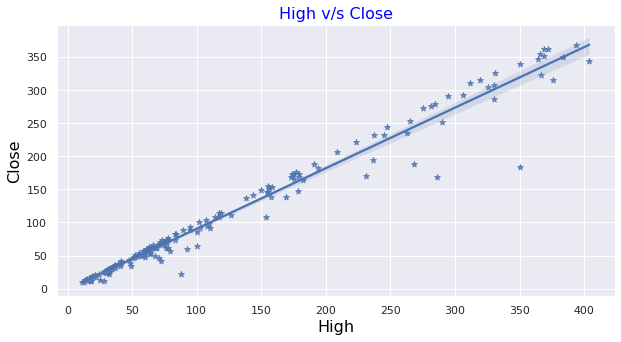

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


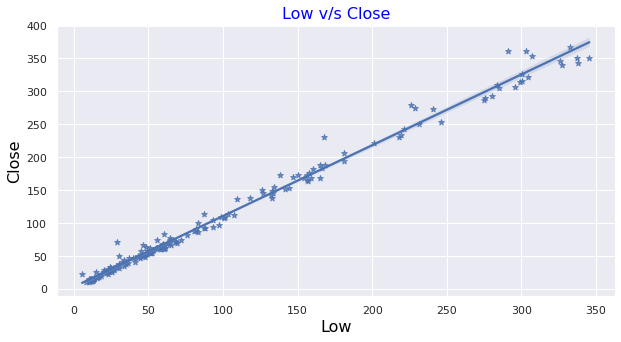

In [20]:
# Scatter plots
for i in independent_variables:
  sns.set(style='darkgrid')
  sns.regplot(dataset[i], dataset['Close'], marker='*')  # by default, fit_reg = True
  plt.title(f"{i} v/s Close", fontsize= 16, color = 'blue')
  plt.xlabel(f'{i}', fontsize=16, color = 'black')
  plt.ylabel("Close", fontsize=16, color='black')
  plt.show()


We can see from scatter plot above, Independent variables such as Low, Open, High are showing the linearity with dependent variable Close.

#### **Histogram with bell shaped curve**

To know about the distribution of features, we are plotting histogram with default kernel density estimate which will give the idea how the data is distributed.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


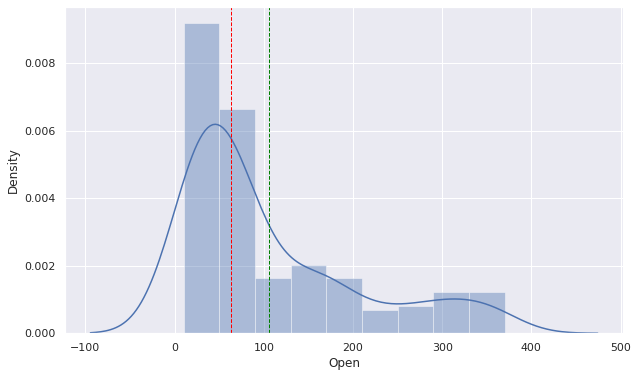

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


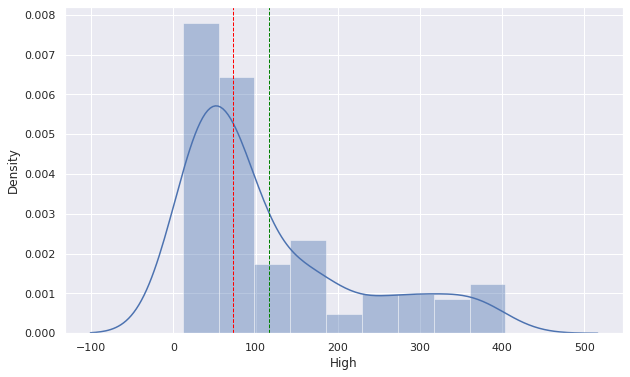

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


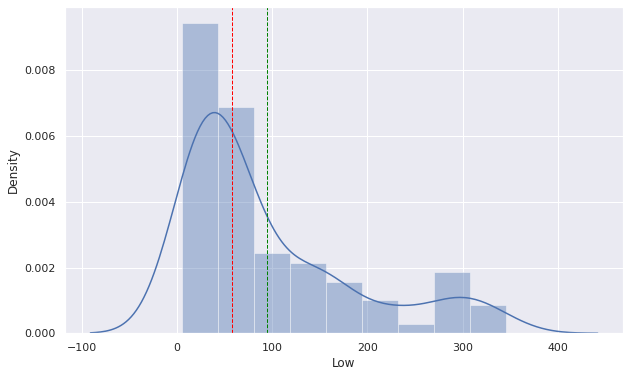

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


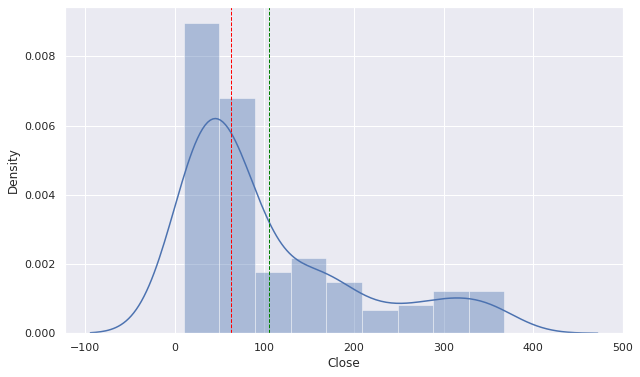

In [21]:
# Histogram
for i in dataset.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(dataset[i])
  plt.xlabel(f"{i}")

  # To plot the mean and the median line, axvline fuction is used which add the vertical line across the axis. 
  plt.axvline(dataset[i].mean(),color='green',linestyle='dashed', linewidth=1)  # vertical line at value mean.
  plt.axvline(dataset[i].median(),color='red',linestyle='dashed',linewidth=1)   # vertical line at value median.
  plt.show()
  

From the above graph, it is observed that:



*   All the freatures are positively skewed distributed. 

*   Mean is greater than Median i.e Mean > Median.
  





#### **Box-Whisker plots**

We are using Box Whisker plot to visualize five number summary and to detect the outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


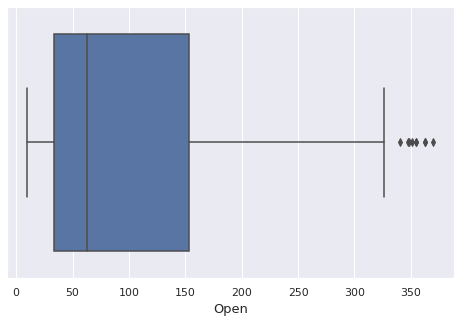

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


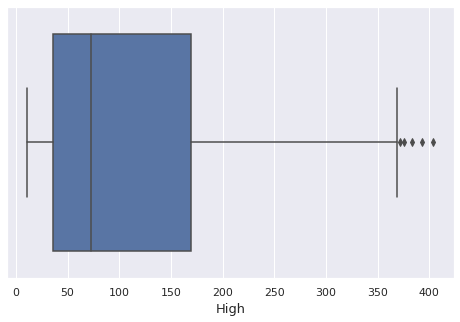

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


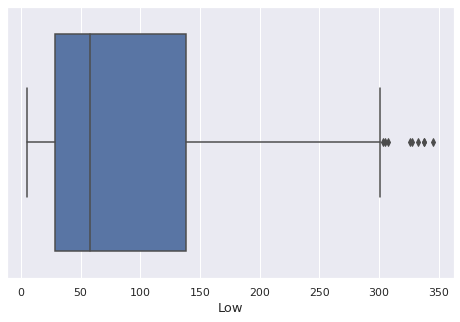

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


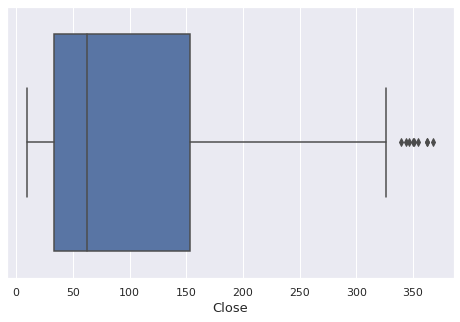

In [22]:
# Box-Whisker plot.
for i in dataset.columns:
  plt.rcParams['figure.figsize']=(8,5)
  sns.boxplot(dataset[i])
  plt.xlabel(f'{i}', fontsize=13)
  plt.show()



It is observed that there are some outliers present in given dataset.

####  **Correlation Heatmap**

Correlation Heatmap is being used to visualize the correlation between features.

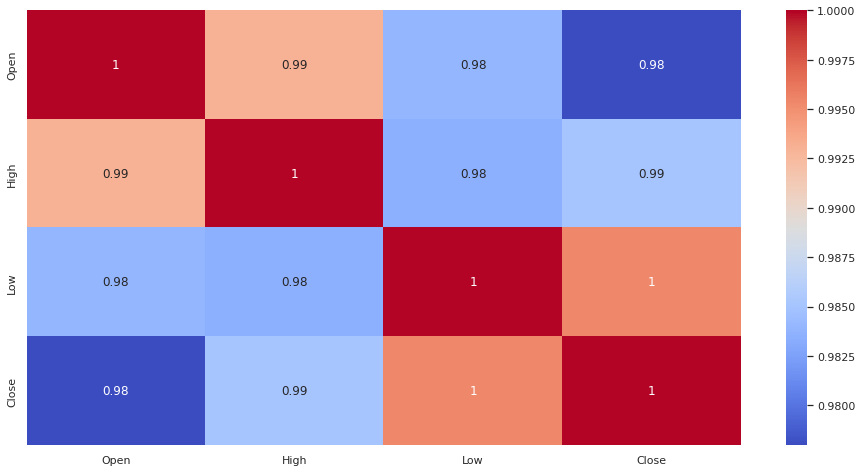

In [23]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,8))
sns.heatmap(dataset[list(dataset.columns)].corr(),cmap='coolwarm', annot = True)

It is found that all the features are strong positively correlated with each other. We can say that preditor variables are correlated which is situation of existance of multicollinearity. 

#### **Pair Plots** 

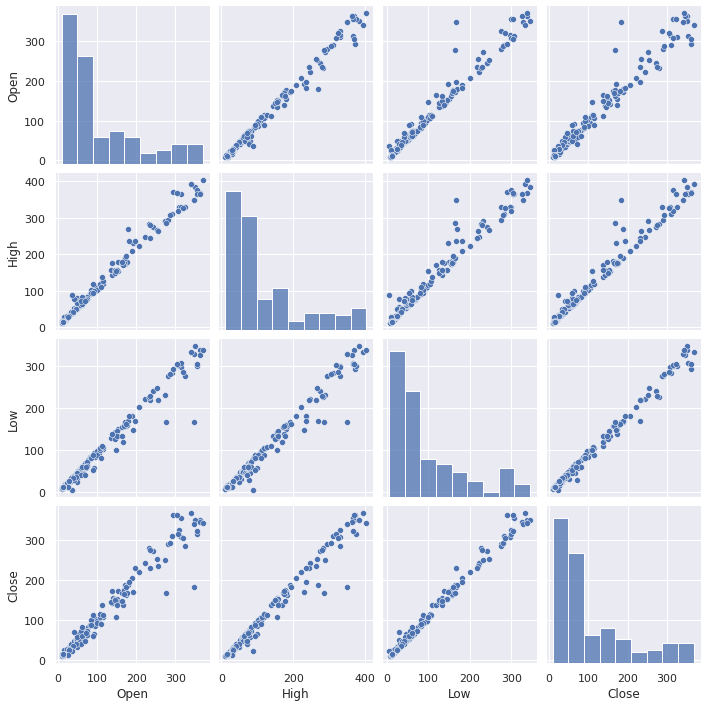

In [24]:
# Pair Plot visualization code
sns.pairplot(dataset)
plt.grid()


To know about the pairwise relationship amongs the variables close, High, Open and Low, pairwise plot is used and it is concluded that scatter plots indicates the joint relationship whereas histograms indicate the univariate distribution.

# ***Forming Assumptions and Obtaining Insights:***



The multiple regression model is based on a following assumptions:


* **Linearity:** There should be linear relationship between the dependent and independent variables.

*   **Normality:** Residual should be normally distributed with mean zero and constant variance σ2


*   **Homoscedasticity:** It means that the variance around the regression line is the same for all values of the predictor variable i.e Close 

*   **Multicollinearity:** There should not be multicollinearity in regression model.




We have observed that

1.   Variance around the regression line is same at origin sided portion after that it is showing heteroscedasticity from the scatter plots.
2.   All the features  with outliers are positively skewed, showing high multicollinearity.

These are the reasons that are violating the assumption of multivariate linear regression.

3. The Stock price is affected by social news.

Let's deal with these problems by taking proper actions:









# ***Data Cleaning and  variable transformation:***

We are using log Transformation on all features to make the distribution normal.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


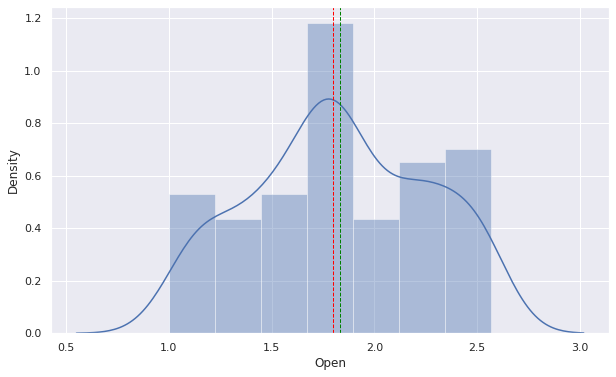

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


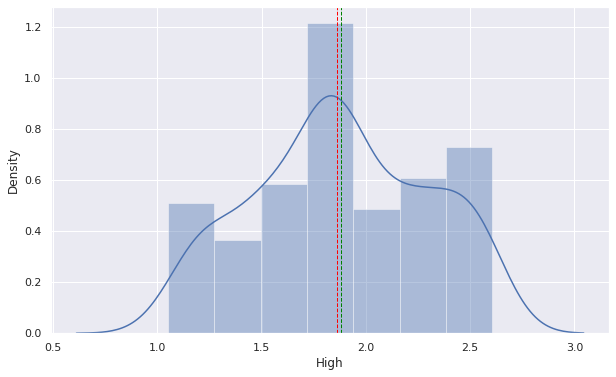

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


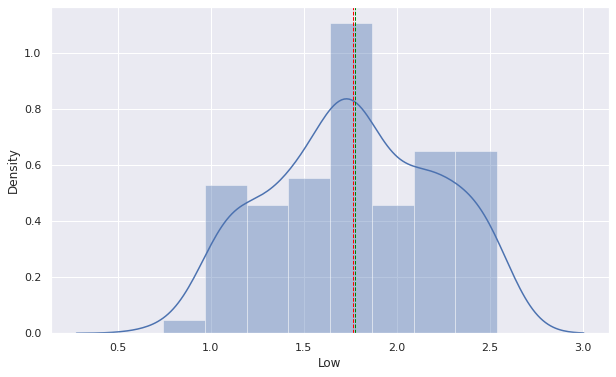

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


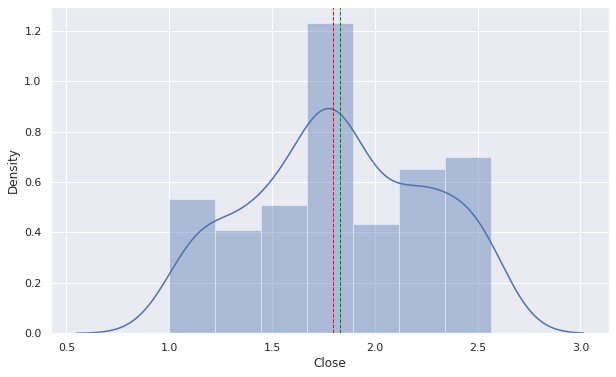

In [25]:
# Histogram
for i in dataset.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(dataset[i]))  # log-transformation
  plt.xlabel(f"{i}")

  # To plot the mean and the median line, axvline fuction is used which add the vertical line across the axis. 
  plt.axvline(np.log10(dataset[i]).mean(),color='green',linestyle='dashed', linewidth=1)  # vertical line at value mean.
  plt.axvline(np.log10(dataset[i]).median(),color='red',linestyle='dashed',linewidth=1)   # vertical line at value median.
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


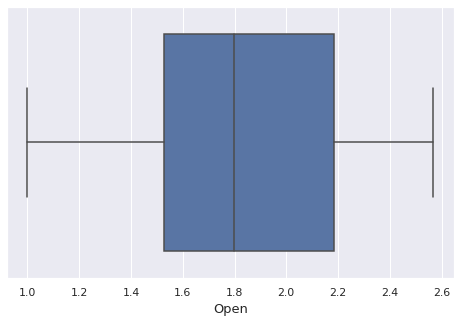

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


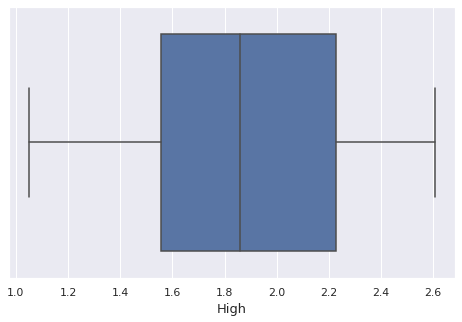

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


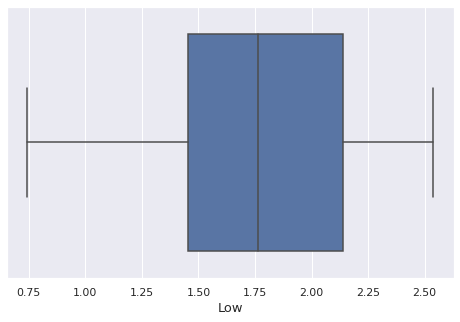

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


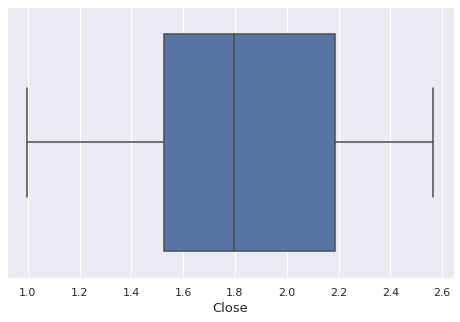

In [26]:
# Box-Whisker plot.
for i in dataset.columns:
  plt.rcParams['figure.figsize']=(8,5)
  sns.boxplot(np.log10(dataset[i]))    # log-transfomation
  plt.xlabel(f'{i}', fontsize=13)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


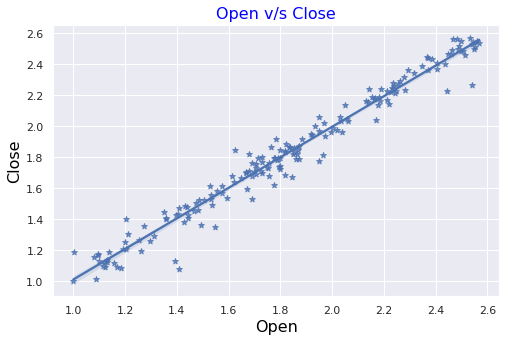

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


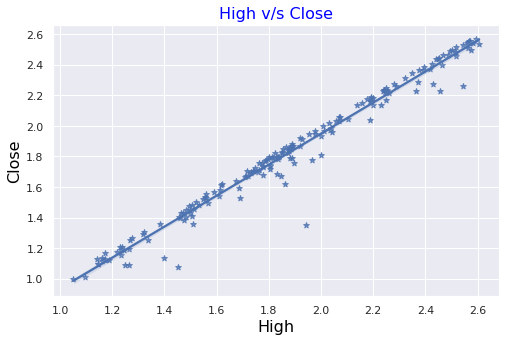

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


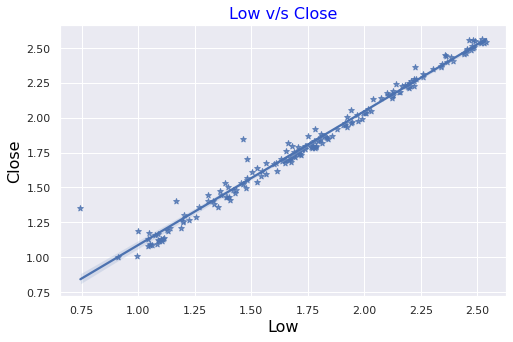

In [27]:
# Scatter plots
for i in independent_variables:
  sns.set(style='darkgrid')
  sns.regplot(np.log10(dataset[i]), np.log10(dataset['Close']), marker='*')  # by default, fit_reg = True
  plt.title(f"{i} v/s Close", fontsize= 16, color = 'blue')
  plt.xlabel(f'{i}', fontsize=16, color = 'black')
  plt.ylabel("Close", fontsize=16, color='black')
  plt.show()

We can see clearly that after applying log-Ttransformation-


1.   Distribution of features are similar to normal distribution. The mean and median values are nearly same.
2.   Log-transformation diminishes the outlier's effect and heteroscedasticity.



# ***Feature Engineering and Data Precessing***